<div style="margin-bottom:-35px;">
    <font color=#FFFFFF markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

# Toepassing: Vormdetectie

<div style="background-color:#8B8000">
Hoewel objectdetectiesystemen tegenwoordig al op veel plaatsen gebruikt worden in de maatschappij, zijn er toch nog heel wat verbeteringen mogelijk. In deze Notebook kom je we wat meer te weten over de basiswerking van een objectdetectiesysteem. Meer specifiek kijken we hiervoor naar het detecteren van vormen.
</div>

## 1. Algemene info

### 1.1 Modules installeren

Voer onderstaande code-cel uit. Deze bevat de modules noodzakelijk voor deze notebook. Dit is een eenmalige actie.

<div style="background-color:#8B0000"> 
Controleert eerst dat deze notebook gebruik maakt van een venv. Vraag indien nodig aan de leerkracht om dit te controleren.</div>

In [1]:
# installeren van module opencv
%pip install opencv-python
# installeren van module numpy
%pip install numpy
# installeren van module matplotlib
%pip install matplotlib

     -------------------------------------- 38.6/38.6 MB 171.3 kB/s eta 0:00:00
     -------------------------------------- 15.8/15.8 MB 282.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.7/7.7 MB 397.2 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 442.1 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 619.2 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
     ------------------------------------ 103.2/103.2 kB 853.3 kB/s eta 0:00:00
     ------------------------------------ 187.5/187.5 kB 596.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="background-color:#000065"> 
<p>Je zal gebruikmaken van opencv. OpenCV-Python is een module ontworpen om computervisieproblemen op te lossen. Deze bevat reeds voorgeprogrammeerde functies die kunnen gebruikt worden voor objectverwerking, -verdeling, -detectie, -herkenning, ...

Hiernaast installeer je ook numpy en matplotlib. Numpy is een module die een scala aan wiskundige en wetenschappelijke functies aanbied. Matplotlib is een module bedoeld om grafieken op te stellen. We zullen deze laatste gebruiken om verwerkte afbeeldingen in de Notebook te tonen.
</div>

### 1.2 Wat is objectdetectie?

De definitie van objectdetectie is als volgt:

> Een computervisietechniek met als doel objecten op een afbeelding of video te lokaliseren en a.d.h.v. een classificatietechniek te identificeren. 


Deze techniek wordt bijvoorbeeld toegepast door de politie bij het oplossen van een misdrijf. Een computersysteem kan namelijk veel sneller werken dan een mens. Toch is het niet zo eenvoudig voor een computer om objecten op een afbeelding te herkennen. Dit komt doordat de computer op een andere manier naar een afbeelding kijkt...

Om de moeilijkheid van objectdetectie duidelijk te maken. Zullen we in deze notebook een eenvoudige toepassing bekijken. Namelijk het detecteren van vormen op een afbeelding. Dit via een `regelgebaseerde (AI) techniek`. 

## 2. Hoe 'ziet' de computer?

### 2.1 Theoretische uitleg

Een computer werkt binair. Een computer zal dus geen afbeelding te zien krijgen zoals wij die zien, maar wel allemaal getallen (zie onderstaande afbeeldingen). Dit werkt als volgt: Een afbeelding bestaat uit pixels. Iedere pixel heeft een bepaalde kleur (R,G,B); die kan worden voorgesteld door een reeks getallen. 

De computer ziet dus eigenlijk geen afbeelding maar een lange reeks aan getallen. Iedere 3 bytes aan getallen stelt een pixel voor. Doordat een computer dus met getallen werkt, zal het moeilijker zijn voor een computer om een voorwerp te herkennen dan voor de mens.

<div style="background-color:#000065">
    Een computer ziet enkel een digitale (binaire) representatie van een afbeelding. De betekenis van wat er te zien is, ontgaat de computer.
</div>

<table style="margin-left: auto;  margin-right: auto;"><tr>
<td><figure>
  <img src="../_afbeeldingen/beeldcomputer.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; width:100%"/>
   <center>"Zien": Mens vs Computer</center> 
    </figure></td>
<td><figure>
  <img src="../_afbeeldingen/watcomputerziet.png" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; width:100%">
  <center>"Zien": Mens vs Computer</center>
</figure></td>
</tr></table>

### 2.2 Beperkingen van computervisie

#### Oefen mee 2.1

- Welk objecten zie je op onderstaande onscherpe afbeeldingen? <div style="background-color:#008000">
    - Afbeelding 1:  auto 
    - Afbeelding 2:  auto 90 graden gedraaid  
</div>

<table style="margin-left: auto;  margin-right: auto;"><tr>
<td><figure>
  <img src="../_afbeeldingen/wazigeafbeelding1.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 10px; width:70%">
   <center>Afbeelding 1</center> 
    </figure></td>
<td><figure>
  <img src="../_afbeeldingen/wazigeafbeelding2.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 10px; width:70%">
  <center>Afbeelding 2</center>
</figure></td>
</tr></table>

Als we beide afbeeldingen zouden verscherpen, is dezelfde auto twee keer te zien. Op de tweede afbeelding is de auto echter 90 graden gedraaid. Waarom identificeer je het object op de tweede afbeelding niet als een rechtstaande auto? Misschien omdat je de link legt met de straat & gebouwen die zichtbaar zijn op de figuur? 

<div style="background-color:#000065">
Terwijl het voor een mens vanzelfsprekend is om objecten te linken aan de omgeving er rond, is dit voor een computer/algoritme veel complexer. Hierin bevindt zich dus grote moeilijkheid bij het detecteren en identificeren van objecten.  
</div>

#### Oefen mee 2.2

- Bekijk onderstaande afbeelding.
    - <div style="background-color:#008000"> Hoeveel honden zie je? 19    </div>    

  <img src="../_afbeeldingen/meerderehonden.png" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; width:40%"/>

Het tellen is niet zo eenvoudig. Dit omdat de honden willekeurig op de afbeelding verspreidt staan. Computers krijgen vaak met afbeeldingen te maken die niet optimaal zijn. Dit kan ook omwille van andere redenen zoals belichting, resolutie, schaal, andere objecten/achtergrond afbeelding, ...

<div style="background-color:#000065">
Hiernaast is er nog een niet te onderschatten aspect. Namelijk dat al deze honden er verschillend uitzien. Hondenrassen verschillen qua grootte, vorm, kleur, ... . Echter zijn het wel allemaal honden. Een model dat alle verschillende rassen als hond herkent, moet ook met afbeeldingen van alle rassen getraind zijn. Dan nog kan het af en toe misgaan. Zou het model onderstaande afbeelding als hond of als kat zien?
</div>

  <img src="../_afbeeldingen/hondkatoranje.png" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; width:20%"/>

## 3. Afbeelding inladen & analyseren

### 3.1 Modules importeren & variabelen/functies klaarzetten 

Importeer de module `opencv` & `matplotlib`.

In [2]:
import cv2
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Voer hierna onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie toont de (verwerkte) afbeelding met `matplotlib`.

In [3]:
#functie om afbeelding weer te geven
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

### 3.2 Afbeelding analyseren

We zullen in deze notebook vormen detecteren op een afbeelding. Het doel is om alle vormen op afbeelding `vormen.png` te herkennen. Na de afbeelding in te laden, kan je deze tonen via de functie **plt_imshow**.

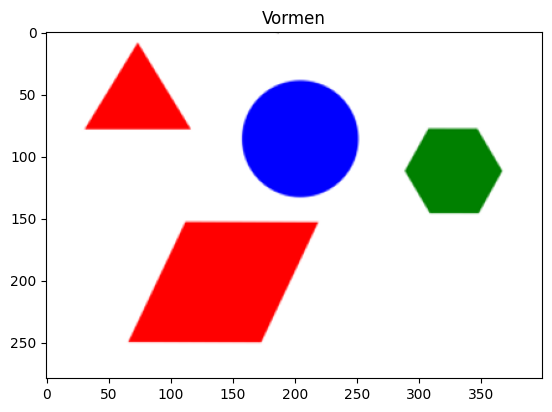

In [5]:
# Afbeelding inladen.
afbeelding = cv2.imread(r"../_afbeeldingen/vormen.png")
afbeelding = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2RGB)

# Afbeelding tonen.
plt_imshow("Vormen", afbeelding)

<div style="background-color:#8B0000"> 
Links van de code-cel staan drie puntjes. Selecteer hier de optie <b>'clear cell outputs'</b> om de afbeelding te verwijderen. Probeer dit eens!
</div>

#### Oefen mee 3.1

-  Beantwoord volgende vragen over de afbeeldingen `vormen.png`: <div style="background-color:#008000">
    - Welke wiskundige vormen herken je?   driehoek, cirkel, trapezium, hexagon
    - Hoe herken je deze vormen? Met andere woorden, waar let je op?   op mijn ogen en nadenken
    - Kan je dit omvormen naar een eigenschap (vb. het ... bepaalt de vorm)? aantal hoeken
</div>

## 4. Algoritme voor vormdetectie

### 4.1 Modules importeren & variabelen/functies klaarzetten 

Importeer de module `opencv` & `matplotlib`.

In [6]:
import cv2
from matplotlib import pyplot as plt

Voer hierna onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie leest een afbeelding in via `opencv` en toont de afbeelding met `matplotlib`.

In [17]:
#functie om afbeelding weer te geven
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

Om het algoritme te ontwikkelen, zal afbeelding `driehoek.jpg` als voorbeeld dienen. controleer of je deze kan inladen. 

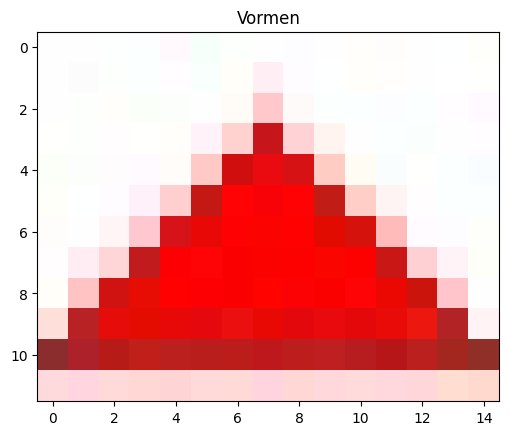

In [8]:
# Afbeelding inladen.
driehoek = cv2.imread(r"../_afbeeldingen/driehoek.jpg")
driehoek = cv2.cvtColor(driehoek, cv2.COLOR_BGR2RGB)

# Afbeelding tonen.
plt_imshow("Vormen",driehoek)

### 4.2 Hoe werkt het algoritme?

Net zoals jij in *oefen mee 3.1* deed. Moet het algoritme eigenschappen gebruiken om de vormen op de afbeelding te herkennen. Wij denken hier niet zo diep meer bij na, maar het is doordat we bepaalde eigenschappen hebben aangeleerd dat het herkennen van objecten zo vlot verloopt. Zo herkennen we bovenstaande vormen aan de hand van het aantal hoeken, aan het aantal evenwijdige zijden, ... . Wij kunnen deze eigenschappen makkelijk zien op het eerste zicht. Een computer kan echter enkel de getallen achter de afbeelding 'zien' (*deel 2.1 'theoretische uitleg'*). 

Wij moeten het algoritme dus aangeven hoe het een bepaalde figuur kan herkennen. Dit door te zeggen op welke eigenschap het moet letten. We kunnen het voor deze implementatie simpel houden. **Het aantal zijden bepaalt de vorm. Een driehoek heeft 3 zijden, een vierhoek 4, enz...**. Een `regelgebaseerde implementatie (AI)` volstaat om een dergelijk algoritme te ontwikkelen.

<div style="background-color:#8B0000"> 
Merk wel op dat deze manier van werken redelijk dom is... er bestaan meerdere vormen met bvb. 4 zijden. Het algoritme zal dus enkel werken voor deze specifieke afbeelding.
</div>

### 4.3 Afbeelding converteren naar grijswaarden

Iedere pixel op een afbeelding bestaat uit 3 getallen tussen 0 en 255 (**RGB**), 3 bytes per pixel met andere woorden. Dit grootte aantal getallen verwerken kan zeer belastend zijn. Om de processor te sparen kan de computer de afbeelding eerst omzetten naar een `grijswaardenafbeelding`. Waarbij iedere pixel slechts uit 1 getal tussen 0 en 255 bestaat, dus slechts 1 byte per pixel. 

Door de pixelwaardes om te zetten naar grijswaarden, is het verschil tussen achtergrond en voorgrond ook duidelijker. In dit geval is de achtergrond wit (hogere pixelwaarde); de vormen zijn grijs/zwart (lagere pixelwaarde).

#### Oefen mee 4.1

Laten we het verschil tussen achter- & voorgrond aantonen via de afbeelding `driehoek.jpg`. Voer hiervoor onderstaand code-blok uit. Deze code vormt de afbeelding om naar grijswaarden. Vervolgens toont het de verwerkte afbeelding, alsook de pixel-waarden van de afbeelding.

- Beantwoord volgende vragen: <div style="background-color:#008000">
    - Welke pixel-waarde(n) heeft de achtergrond?  3 bytes RGB waarde
    - Welke pixel-waarde(n) heeft de driehoek?   3 zijdes
</div>

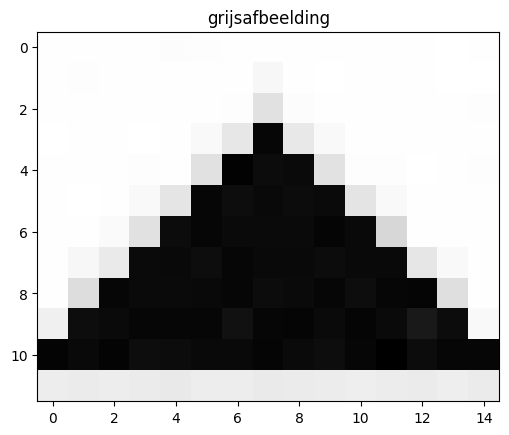

[[254 254 254 254 251 252 254 254 253 254 254 253 254 255 254]
 [254 252 254 254 254 253 254 244 253 255 254 254 254 255 255]
 [254 254 254 253 253 254 252 217 251 254 254 253 254 254 252]
 [255 254 254 255 254 247 223  75 224 247 254 254 253 254 254]
 [253 253 253 252 253 217  72  78  77 218 252 252 255 254 252]
 [254 255 253 246 221  75  79  76  78  77 220 247 254 254 254]
 [253 254 248 217  78  75  77  77  77  74  76 207 253 253 254]
 [254 243 226  77  76  79  75  76  76  78  76  76 222 247 254]
 [254 213  75  77  77  76  75  78  77  75  79  75  74 215 254]
 [232  79  77  75  75  75  81  75  74  77  74  77  86  78 247]
 [ 73  76  73  79  78  76  76  74  77  79  75  70  78  75  75]
 [229 227 229 227 225 229 229 226 227 228 230 228 227 230 227]]


In [9]:
# Afbeelding inladen (met grijswaarden).
driehoek = cv2.imread(r"../_afbeeldingen/driehoek.jpg")
driehoek_grijs = cv2.cvtColor(driehoek, cv2.COLOR_BGR2GRAY)

# Afbeelding & pixelwaarden tonen.
plt_imshow("grijsafbeelding", driehoek_grijs)
print(driehoek_grijs)

#### Oefen mee 4.2

Vorm zelf de afbeelding `vormen.png` om naar grijswaarden. Baseer je hiervoor op de code uit **oefen mee 4.1**. Toon zowel de omgevormde afbeelding als de nieuwe pixelwaarden.

<div style="background-color:#8B0000"> 
De lijst met pixel-waarden wordt ingekort door Notebook. Al deze waarden tonen zou teveel ruimte innemen.
</div>


<div style="background-color:#000065"> 
Het elimineren van de kleur is in het geval van vormdetectie geen probleem. In andere gevallen kan dit wel nadelig zijn. Het is dus belangrijk om op voorhand hierover na te denken. Bij objectherkenning geven kleuren je veel extra informatie. Deze weggooien zal het algoritme slechter doen werken.
</div>

### 4.4 Drempelwaarde instellen

Het verschil tussen achter- & voorgrond is voor ons duidelijk. Voor de computer is dit echter nog niet het geval. Er mag geen onzekerheid zijn voor de computer. Merk echter op dat de pixels aan de rand van de driehoek lichter van kleur zijn...

We moeten ervoor zorgen dat alle pixels op de achtergrond wit zijn, en alle van de driehoek zwart. We zullen hiervoor een `drempelwaarde (of threshold)` instellen via de functie **threshold**.
- Alle pixels onder deze drempel krijgen een nieuwe waarde 0 (**zwart**). 
- Alle pixels boven deze drempel krijgen een nieuwe waarde 255 (**wit**).

#### Oefen mee 4.3

Run de code hieronder, je ziet nu in de matrix duidelijk de driehoek staan. Alle pixels van de driehoek hebben namelijk als waarde 0 (**zwart**). De achtergrond is volledig 255 (**wit**)

- Zal de driehoek groter of kleiner worden als ... (eerst antwoorden, dan controleren) <div style="background-color:#008000"> 
    - een drempelwaarde van 75 is ingesteld: Kleiner
    - een drempelwaarde van 230 is ingesteld: Groter 
- Stel de drempelwaarde terug in op 127.
</div>

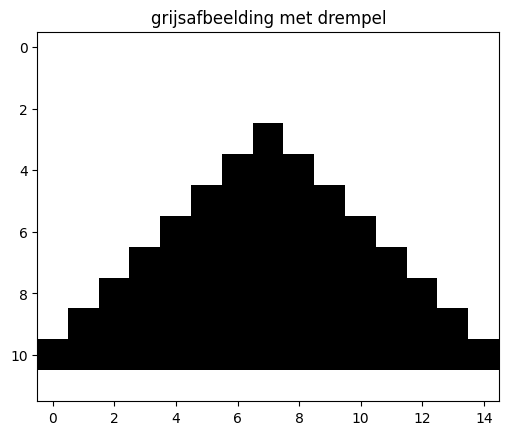

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255   0   0   0   0   0   0   0   0   0   0   0 255 255]
 [255   0   0   0   0   0   0   0   0   0   0   0   0   0 255]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]]


In [15]:
# Afbeelding inladen (met grijswaarden).
driehoek = cv2.imread(r"../_afbeeldingen/driehoek.jpg")
driehoek_grijs = cv2.cvtColor(driehoek, cv2.COLOR_BGR2GRAY)

# Drempel gebruiken om driehoek & achtergrond volledig te scheiden.
# Alle pixels kleiner dan 127 worden 0, groter dan 127 worden 255.
_, driehoek_drempel = cv2.threshold(driehoek_grijs, 127, 255, cv2.THRESH_BINARY)

# Afbeelding & pixelwaarden tonen.
plt_imshow("grijsafbeelding met drempel", driehoek_drempel)
print(driehoek_drempel)

#### Oefen mee 4.4

Schrijf nu zelf een stukje code die de afbeelding `vormen.png` omzet naar grijswaarden en er vervolgens een drempelwaarde op toepast. Maak hiervoor gebruik van de voorgaande codeblokken.

<div style="background-color:#8B0000"> 
De matrix met pixel-waarden kan niet volledig geprint worden. Baseer je dus op de afbeelding om een correcte drempelwaarde in te stellen.
</div>

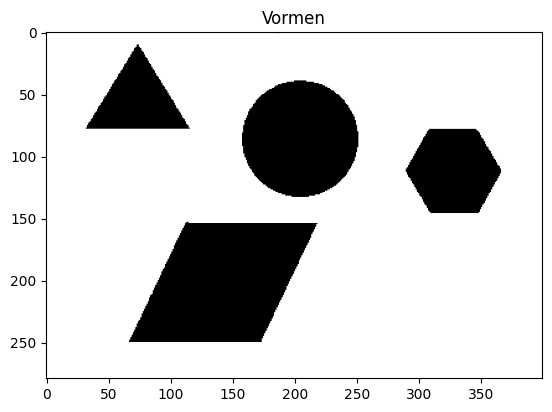

In [22]:
# pad naar vormen.png: r"../_afbeeldingen/vormen.png"
# Afbeelding inladen.
afbeelding = cv2.imread(r"../_afbeeldingen/vormen.png")
afbeelding_grey = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2GRAY)

# Drempel gebruiken om driehoek & achtergrond volledig te scheiden.
# Alle pixels kleiner dan 127 worden 0, groter dan 127 worden 255.
_, afbeelding_drempel = cv2.threshold(afbeelding_grey, 127, 255, cv2.THRESH_BINARY)

# Afbeelding tonen.
plt_imshow("Vormen", afbeelding_drempel)

### 4.5 Contouren uit afbeelding halen

In de voorgaande stap hebben we de voorgrond (de vormen) duidelijk gescheiden van de achtergrond. De computer kan nu de contour (= rand) van iedere vorm op de afbeelding bepalen. Hiervoor wordt de functie `findcontours` gebruikt.

#### Oefen mee 4.5

Onderstaande code zoekt de contouren in de verwerkte `driehoek.jpg`. Onderaan wordt het aantal gevonden contouren geprint.

- Maak de TODO in de code af.
- Het programma vindt 2 contouren.  <div style="background-color:#008000"> 
    - Welke zijn dit?  zwart en wit 
</div>

- Pas de code aan zodat deze de contouren van `vormen.png` bepaald. Doe dit in de tweede code-cel! <div style="background-color:#008000"> 
    Hoeveel zijn dit er?  2 
</div>

In [23]:
# TODO: stel driehoek_drempel op. Gebruik hiervoor code uit de vorige oefen mee.


# Bepaal contouren van (verwerkte) afbeelding.
contouren, _ = cv2.findContours(driehoek_drempel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
# Print aantal gevonden contouren.
print(f"Aantal contouren: {len(contouren)}")
print(contouren)

Aantal contouren: 2
(array([[[ 0, 11]],

       [[14, 11]]], dtype=int32), array([[[ 0,  0]],

       [[ 0,  9]],

       [[ 7,  2]],

       [[14,  9]],

       [[14,  0]]], dtype=int32))


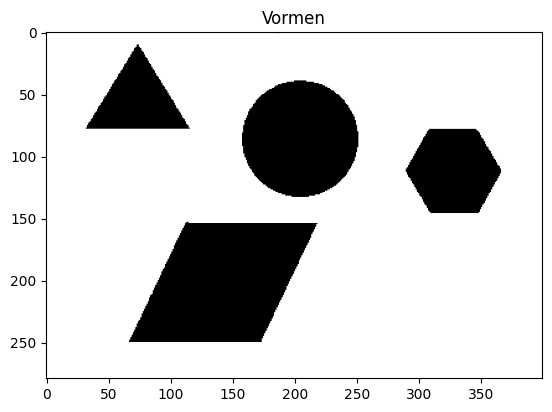

Aantal contouren: 5
(array([[[  0,   0]],

       [[  0, 278]],

       [[399, 278]],

       [[399,   0]],

       [[188,   0]],

       [[187,   1]],

       [[186,   1]],

       [[185,   0]]], dtype=int32), array([[[113, 152]],

       [[114, 152]],

       [[115, 153]],

       [[218, 153]],

       [[219, 154]],

       [[218, 155]],

       [[218, 156]],

       [[217, 157]],

       [[217, 158]],

       [[216, 159]],

       [[216, 160]],

       [[215, 161]],

       [[215, 162]],

       [[214, 163]],

       [[214, 165]],

       [[213, 166]],

       [[213, 167]],

       [[212, 168]],

       [[212, 169]],

       [[211, 170]],

       [[211, 171]],

       [[210, 172]],

       [[210, 173]],

       [[209, 174]],

       [[209, 175]],

       [[208, 176]],

       [[208, 177]],

       [[207, 178]],

       [[207, 179]],

       [[206, 180]],

       [[206, 181]],

       [[205, 182]],

       [[205, 183]],

       [[204, 184]],

       [[204, 186]],

       [[203, 187]]

In [30]:
# TODO: detecteer hier het aantal contouren op afbeeldingen 'vormen.png'.
# pad naar vormen.png: r"../_afbeeldingen/vormen.png"
afbeelding = cv2.imread(r"../_afbeeldingen/vormen.png")
afbeelding_grey = cv2.cvtColor(afbeelding, cv2.COLOR_BGR2GRAY)

# Drempel gebruiken om driehoek & achtergrond volledig te scheiden.
# Alle pixels kleiner dan 127 worden 0, groter dan 127 worden 255.
_, afbeelding_drempel = cv2.threshold(afbeelding_grey, 127, 255, cv2.THRESH_BINARY)

# Afbeelding tonen.
plt_imshow("Vormen", afbeelding_drempel)

# Bepaal contouren van (verwerkte) afbeelding.
contouren, _ = cv2.findContours(afbeelding_drempel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
# Print aantal gevonden contouren.
print(f"Aantal contouren: {len(contouren)}")
print(contouren)


### 4.6 Vormen bepalen (via aantal zijden)

Tot slot kan functie `approxPolyDP` het aantal zijden van een contour bepalen. Via dit aantal zijden bepalen we de vorm van de contour.

#### Oefen mee 4.6

Gebruik onderstaande code om de vormen in `driehoek.jpg` & `vormen.png` te printen.

<div style="background-color:#8B0000"> 
Herinner je dat in notebooks ingeladen code onthouden blijft. Voer de code van *oefen mee 4.5* uit. Hiermee laad je de contouren in. Voer hierna onderstaande blok uit. Deze print de gevonden vormen op de afbeelding.
</div>

- Het algoritme zal de driehoek in `driehoek.jpg` classificeren als een vijfhoek. <div style="background-color:#008000"> 
    - Hoe komt dit? omdat het verdraaid is 
</div> 

In [31]:
# Zet verschillende vormen klaar.
soort_vorm = {0:"cirkel", 3: "driehoek", 4: "vierhoek", 5: "vijfhoek", 6: "zeshoek"}
# Overloop alle contouren.
for index, contour in enumerate(contouren): # TODO: zorg ervoor dat variabele contouren gekend is

    # Sla eerste contour over (zie oefen mee 4.5 voor reden).
    if index == 0: 
        continue

    # Bepaal aantal zijden.
    zijden = len(cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True))
    # Bepaal en print vorm.
    gevonden_vorm = soort_vorm.get(zijden, "cirkel")
    print(f"Aantal zijden van vorm 1: {zijden}")
    print(f"Er staat een {gevonden_vorm} op de afbeelding!\n")

Aantal zijden van vorm 1: 4
Er staat een vierhoek op de afbeelding!

Aantal zijden van vorm 1: 6
Er staat een zeshoek op de afbeelding!

Aantal zijden van vorm 1: 16
Er staat een cirkel op de afbeelding!

Aantal zijden van vorm 1: 3
Er staat een driehoek op de afbeelding!



## Slotresultaat

Het is een ding om de gevonden vormen te printen. Het is natuurlijk leuker om deze visueel te tonen. Voer onderstaande 3 code-blokken uit. De functie `bepaal_vormen` zal op basis van de gevonden contouren, de afbeelding aanpassen. Dit door kaders rond de contouren te tekenen & labels met de vormen toe te voegen.

In [25]:
import cv2
from matplotlib import pyplot as plt

In [26]:
# Functie om afbeelding weer te geven.
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

# Functie om vormen te bepalen & toe te voegen aan de afbeelding.
def bepaal_vormen(afbeelding, contouren):
    # Zet verschillende vormen klaar.
    soort_vorm = {0:"cirkel", 3: "driehoek", 4: "vierhoek", 5: "vijfhoek", 6: "zeshoek"}
    # Overloop alle contouren.
    for index, contour in enumerate(contouren):
    
        # Sla eerste contour over (zie oefen mee 4.5 voor reden).
        if index == 0: 
            continue
    
        # Bepaal aantal zijden.
        zijden = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Teken vorm rond contour.
        cv2.drawContours(afbeelding, [contour],-1, (0, 255, 0), 5)
    
        # zoekt centrum van contour (voor plakken van label).
        M = cv2.moments(contour)
        x = int(M["m10"]/M["m00"])-35
        y = int(M["m01"]/M["m00"])

        # Bepaal soort vorm op basis van aantal zijden.
        gevonden_vorm = soort_vorm.get(len(zijden), "cirkel")

        # zet correcte label op centrum van de vorm
        cv2.putText(afbeelding, gevonden_vorm, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        
    return afbeelding 

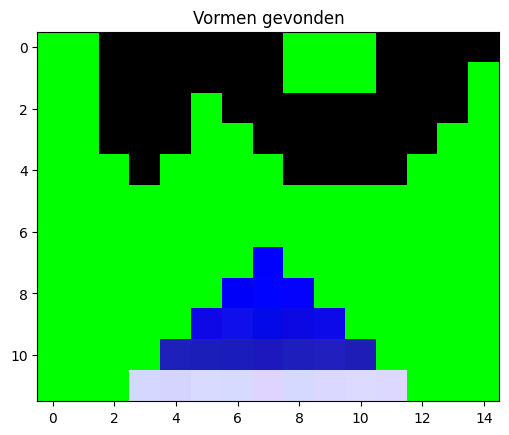

In [29]:
# Afbeelding inladen (met grijswaarden).
vormen = cv2.imread(r"../_afbeeldingen/driehoek.jpg")
vormen_grijs = cv2.cvtColor(vormen, cv2.COLOR_BGR2GRAY)

# Drempel gebruiken om driehoek & achtergrond volledig te scheiden.
# Alle pixels kleiner dan 127 worden 0, groter dan 127 worden 255.
_, vormen_drempel = cv2.threshold(vormen_grijs, 127, 255, cv2.THRESH_BINARY)

contouren, _ = cv2.findContours(vormen_drempel, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
vormen_resultaat = bepaal_vormen(vormen, contouren) # !!! Merk op: voegt gevonden vormen toe aan originele afbeelding !!! 

plt_imshow("Vormen gevonden", vormen_resultaat)

<div style="background-color:#8B8000"> 
Probeer bovenstaande code om te vormen zodat deze <b>driehoek.jpg</b> gebruikt (Tip! wijzig het pad). Het resultaat zal er niet fantastisch uit zien. Hoe kan dit komen? 
</div>

#
  <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de Landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van S. Pletinck , F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 